Loading the Dataset

In [1]:
import pandas as pd

# Upload CSV file manually in Colab, then load it
df = pd.read_csv('StudentsPerformance.csv')

# Show first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data Cleaning

In [2]:
# Check for null values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Rename columns for easier access (optional)
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df.head()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data Labelling

In [3]:
# Add 'pass_math', 'pass_reading', 'pass_writing'
df['pass'] = ((df['math_score'] >= 40) &
              (df['reading_score'] >= 40) &
              (df['writing_score'] >= 40)).astype(int)

df[['math_score', 'reading_score', 'writing_score', 'pass']].head()


,math_score,reading_score,writing_score,pass
0,72,72,74,1
1,69,90,88,1
2,90,95,93,1
3,47,57,44,1
4,76,78,75,1


Explolatory Data Analytics

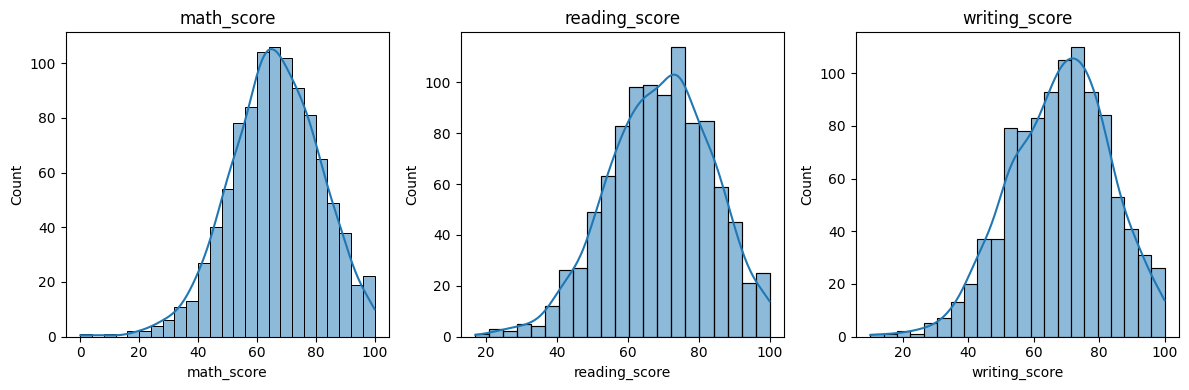

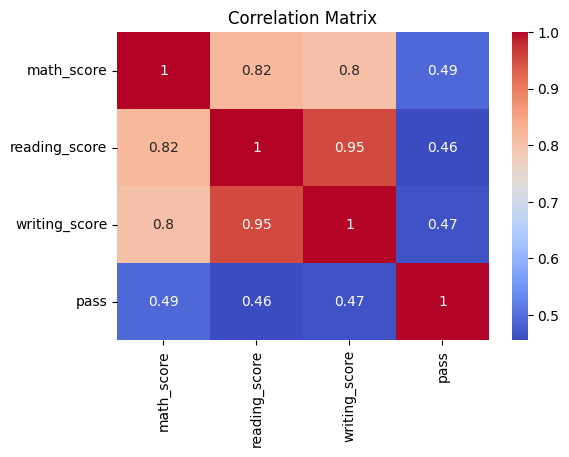

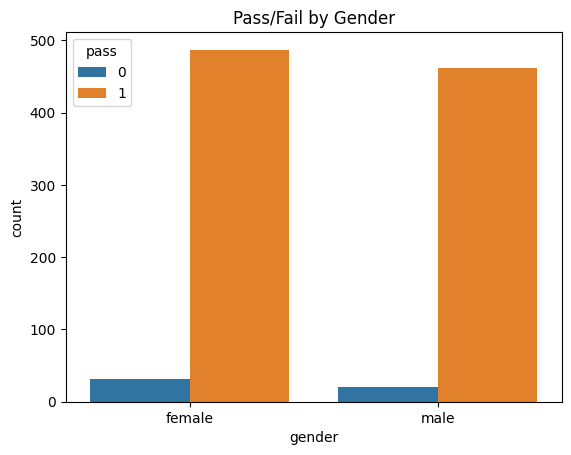

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Scores
plt.figure(figsize=(12, 4))
for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score', 'pass']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pass rate by gender
sns.countplot(x='gender', hue='pass', data=df)
plt.title('Pass/Fail by Gender')
plt.show()


Data Preprocessing for Model Development

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
cat_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
df_encoded = df.copy()

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop(['pass'], axis=1)
y = df_encoded['pass']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training of Logistic and Random Forest Model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Evaluating Model

In [7]:
# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.985
Confusion Matrix:
 [[ 11   2]
 [  1 186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.99      0.99      0.99       187

    accuracy                           0.98       200
   macro avg       0.95      0.92      0.94       200
weighted avg       0.98      0.98      0.98       200

Random Forest:
Accuracy: 1.0
Confusion Matrix:
 [[ 13   0]
 [  0 187]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00       187

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

